<a href="https://colab.research.google.com/github/69421/mathematic-for-quantitative-finance/blob/main/Modulation_d'amplitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulation d'Amplitude

https://fr.wikipedia.org/wiki/Modulation_d%27amplitude

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [79]:
tickers = "AMD"
start = '2020-01-01'
end = '2024-12-31'

In [80]:
dataset = yf.download(tickers, start, end)

[*********************100%***********************]  1 of 1 completed


In [81]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD
Date,,,,,
2020-01-02,49.099998,49.250000,46.630001,46.860001,80331100
2020-01-03,48.599998,49.389999,47.540001,48.029999,73127400
2020-01-06,48.389999,48.860001,47.860001,48.020000,47934900
2020-01-07,48.250000,49.389999,48.040001,49.349998,58061400
2020-01-08,47.830002,48.299999,47.139999,47.849998,53767000


In [82]:
data = dataset["Close"].values

In [103]:
# 2. Normaliser le signal (important pour AM)
normalized_data = (data - np.mean(data)) / np.max(np.abs(data))

In [111]:
# Définir la modulation d'amplitude
def amplitude_modulation(signal, carrier_frequency, modulation_index):
    # Create a time array
    time = np.arange(0, len(signal)) / len(signal)

    # Create the carrier signal
    carrier_signal = np.cos(2 * np.pi * carrier_frequency * time)

    # Modulate the signal
    return (signal - np.mean(signal)) / np.max(np.abs(signal))


In [112]:
# Régler le signal porteur et le signal modulé
frequency = 0.05  # ajuster si possible
modulation_index = 0.8  # ajuster si possible

In [113]:
modulated = amplitude_modulation(normalized_data, frequency, modulation_index)

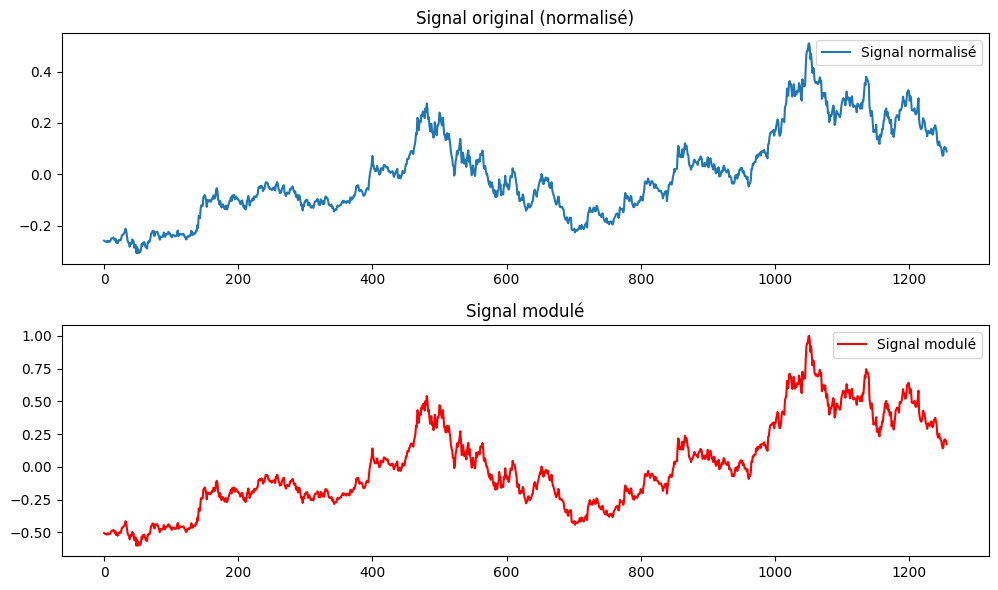

In [116]:
# plot le signal original et MA_modulé
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(normalized_data, label='Signal normalisé')
plt.title('Signal original (normalisé)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(modulated, color = "red", label='Signal modulé')
plt.title('Signal modulé')
plt.legend()

plt.tight_layout()
plt.show()
